# Example single fit

Fitting method

- Read data
- Select and create model
- Fit the data with model
- Save plots and log

## Quick fit

01:08:25 ----- WARNING  ----- estimate_runtime
Calculating chi2: ETA ~ 0 s


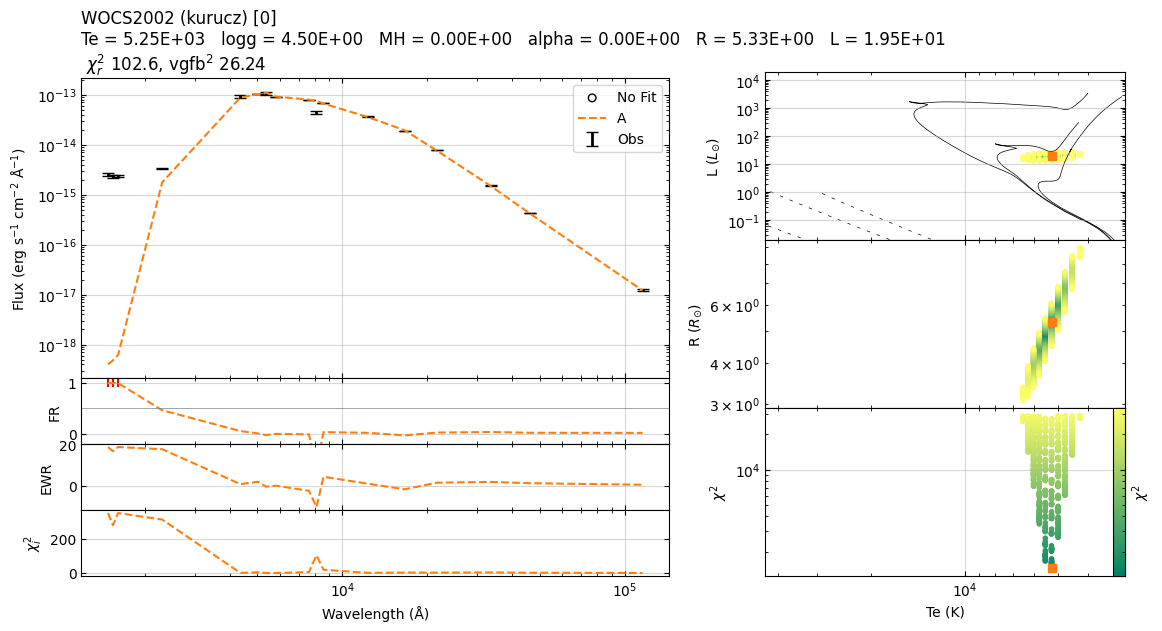

In [1]:
import src.binary_sed_fitting as bsf
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc
################################################################################
model_name = 'kurucz'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0],
          'alpha': [ 0.0,  0.0]}
model = bsf.Model(model_name, limits=limits)
################################################################################
star = bsf.Star(name=name, 
                distance=distance, 
                e_distance=e_distance,
                data=data, 
                model=model)
################################################################################
star.fit_chi2()
star.plot()

## Selecting model
- Supported models: Kurucz, Koester and Kurucz_UVBLUE

In [19]:
import src.binary_sed_fitting as bsf
################################################################################
model_name = 'kurucz'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0],
          'alpha': [ 0.0,  0.0]}
model = bsf.Model(model_name, limits=limits)
print(model_name, '\n\n\n' ,model.da)
################################################################################
model_name = 'kurucz_uvblue'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0]}
model = bsf.Model(model_name, limits=limits)
print(model_name, '\n\n\n' ,model.da)
################################################################################
model_name = 'koester'
limits = {'Te'   : [5000, 80000],
          'logg' : [ 6.5,   9.5]}
model = bsf.Model(model_name, limits=limits)
print(model_name, '\n\n\n' ,model.da)

kurucz 


 <xarray.DataArray (FilterID: 8162, Te: 23, logg: 5, MH: 1, alpha: 1)> Size: 8MB
[938630 values with dtype=float64]
Coordinates:
  * FilterID  (FilterID) <U38 1MB 'Swift/UVOT.UVM2_fil' ... 'QUIJOTE/MFI.11GH...
  * Te        (Te) int32 92B 3500 3750 4000 4250 4500 ... 8250 8500 8750 9000
  * logg      (logg) float64 40B 3.0 3.5 4.0 4.5 5.0
  * MH        (MH) float64 8B 0.0
  * alpha     (alpha) float64 8B 0.0
Attributes:
    Wavelengths:  [1.19128077e+00 1.24254209e+00 1.48134125e+02 ... 3.8683349...
    unit:         erg/s/cm2/A
    long_name:    Flux
kurucz_uvblue 


 <xarray.DataArray (FilterID: 8162, Te: 12, logg: 5, MH: 1)> Size: 4MB
[489720 values with dtype=float64]
Coordinates:
  * FilterID  (FilterID) <U38 1MB 'Swift/UVOT.UVM2_fil' ... 'QUIJOTE/MFI.11GH...
  * Te        (Te) int32 48B 3500 4000 4500 5000 5500 ... 7500 8000 8500 9000
  * logg      (logg) float64 40B 3.0 3.5 4.0 4.5 5.0
  * MH        (MH) float64 8B 0.0
    alpha     float64 8B ...
Attributes:
    Wavel

## Recommended fitting routine

- `Star`
    - `name` : Name of the star
    - `distance`, `e_distance` : Distance and it's error in pc
    - `filters_to_drop` : Filters to be removed from the fit (due to bad data, bad fit, saturation...)
    - `wavelength_range` : Wavelength range to be fitted in Angstrom
    - `data` : DataFrame with the photometric flux
    - `model` : Model object of required model and parameter limits
    - `r_limits` : 2 options
        - `blackbody` : Radius range automatically calculated from blackbody fit
        - `[r_min,r_max]` : Radius is varied between the r_min and r_max given in solar radii
    - `run_name` : A string name for tracking different fits

- `fit_chi2`
    - Calculates chi2 for the data and model.
    - `refit`
        - if `True` : the fit is redone. 
        - If `False`: If a previous fit is available, it is read. Otherwise a fresh fit is made.

- `fit_noisy_chi2`
    - Fits chi2 by adding noise to the data. Useful for getting statistical errors.
    - `refit` : if `True` the fit is redone. If `False`, the previous fit is read.

- `plot`
    - `add_noisy_seds` : Whether to plot the noisy SEDs.
    - `folder` : Folder for saving the plot
    - `FR_cutoff` : Fractional residual cutoff for indicating excess flux

- `plot_public`
    - Plots a smaller plot with SED, FR and EWR

- `save_summary`
    - Saves the fit parameters in a logfile

### Example 1

01:06:44 ----- INFO     ----- __init__
----------------------------------------------------------
------------            WOCS2002 A            ------------
----------------------------------------------------------
01:06:44 ----- INFO     ----- drop_filters
                        Fitted           Not fitted
wavelength                                         
1481.000000                     Astrosat/UVIT.F148W
1541.000000                     Astrosat/UVIT.F154W
1608.000000                     Astrosat/UVIT.F169M
2303.366368                         GALEX/GALEX.NUV
4357.276538      KPNO/Mosaic.B                     
5035.750275     GAIA/GAIA3.Gbp                     
5366.240786      KPNO/Mosaic.V                     
5822.388714       GAIA/GAIA3.G                     
7619.959993     GAIA/GAIA3.Grp                     
8101.609574                           KPNO/Mosaic.I
8578.159519    GAIA/GAIA3.Grvs                     
12350.000000     2MASS/2MASS.J                     
16620.000000 

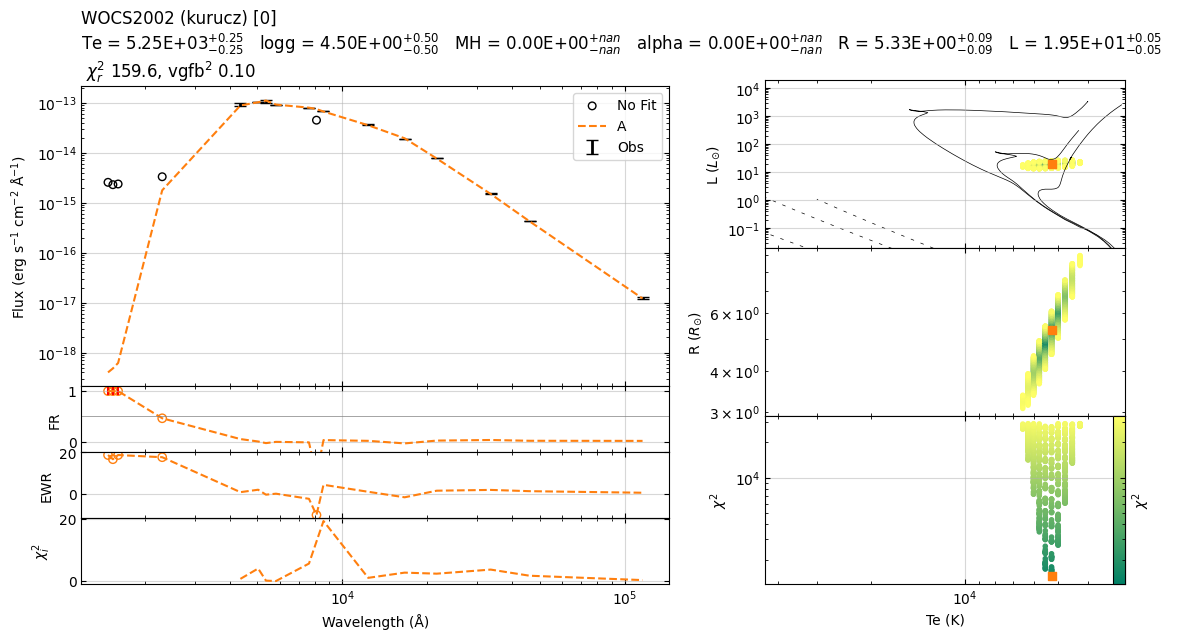

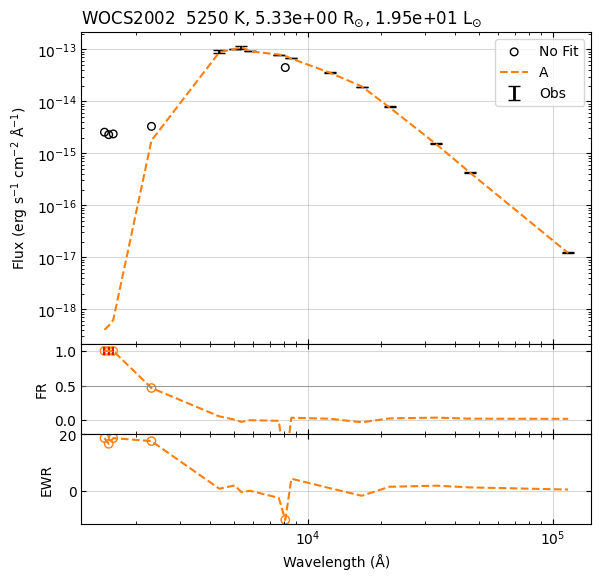

In [20]:
import src.binary_sed_fitting as bsf
import warnings
warnings.filterwarnings("ignore")
bsf.console.setLevel(bsf.logging.INFO)
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc

refit    = False
run_name = '0'
################################################################################
model_name = 'kurucz'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0],
          'alpha': [ 0.0,  0.0]}
model = bsf.Model(model_name, limits=limits)
################################################################################
star = bsf.Star(name=name, 
                distance=distance, 
                e_distance=e_distance,
                filters_to_drop=['KPNO/Mosaic.I'], 
                wavelength_range=[3000, 1_000_000_000],
                data=data, 
                model=model, 
                r_limits='blackbody',     
                run_name=run_name)
################################################################################
star.fit_chi2(refit=refit)
star.fit_noisy_chi2(refit=refit)
################################################################################
star.plot(add_noisy_seds=False,
          folder='plots/',
          FR_cutoff=0.5)
star.plot_public(add_noisy_seds=False,
                 folder='plots/',
                 FR_cutoff=0.5)
################################################################################
star.save_summary()

### Example 2

01:06:49 ----- WARNING  ----- estimate_runtime
Calculating chi2: ETA ~ 0 s
01:06:49 ----- WARNING  ----- get_parameters_from_chi2_minimization
Based on chi2, I recommend removal of following filters: ['WISE/WISE.W1']; chi2=[1722.3066831]
01:06:49 ----- WARNING  ----- estimate_runtime
Calculating noisy chi2: ETA ~ 1 s
01:06:51 ----- WARNING  ----- get_realistic_errors_from_iterations
logg_A : The best fit value is at upper limit of the model.


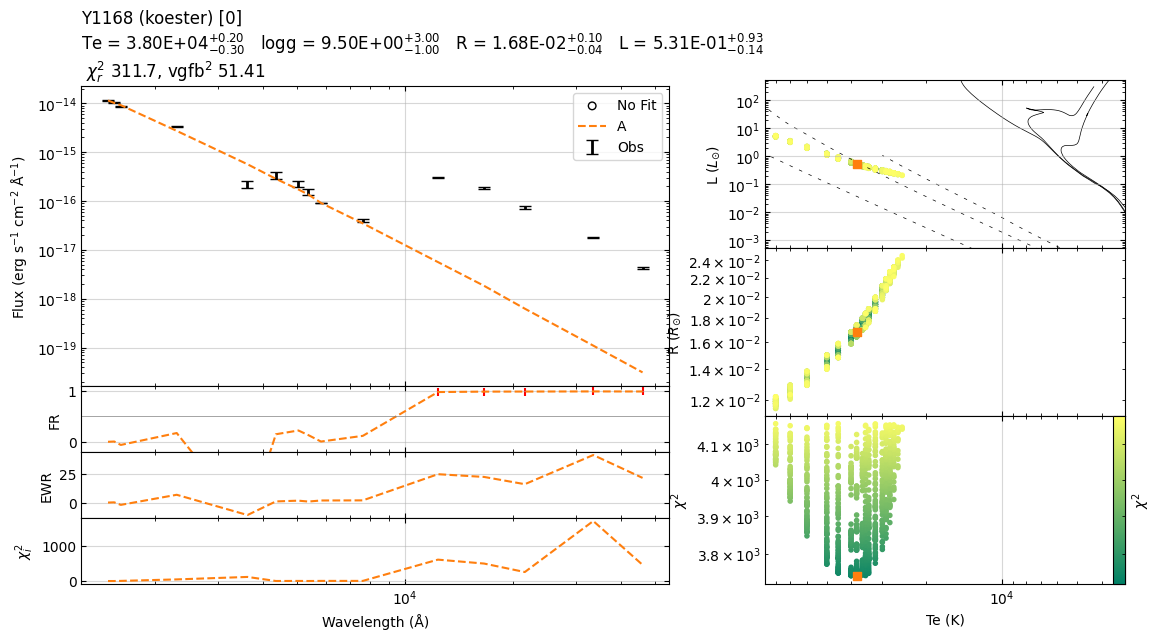

In [21]:
import src.binary_sed_fitting as bsf
import warnings
warnings.filterwarnings("ignore")
bsf.console.setLevel(bsf.logging.WARNING)
################################################################################
name        = 'Y1168'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc

refit    = False
run_name = '0'
################################################################################
model_name = 'koester'
limits = {'Te'   : [5000, 80000],
          'logg' : [ 6.5,   9.5]}
model = bsf.Model(model_name, limits=limits)
################################################################################
star = bsf.Star(name=name, 
                distance=distance, 
                e_distance=e_distance,
                filters_to_drop=[], 
                wavelength_range=[0, 1_000_000_000],
                data=data, 
                model=model, 
                r_limits='blackbody',     
                run_name=run_name)
################################################################################
star.fit_chi2(refit=refit)
star.fit_noisy_chi2(refit=refit)
################################################################################
star.plot(add_noisy_seds=False,
          folder='plots/',
          FR_cutoff=0.5)
star.save_summary()

### Example 3

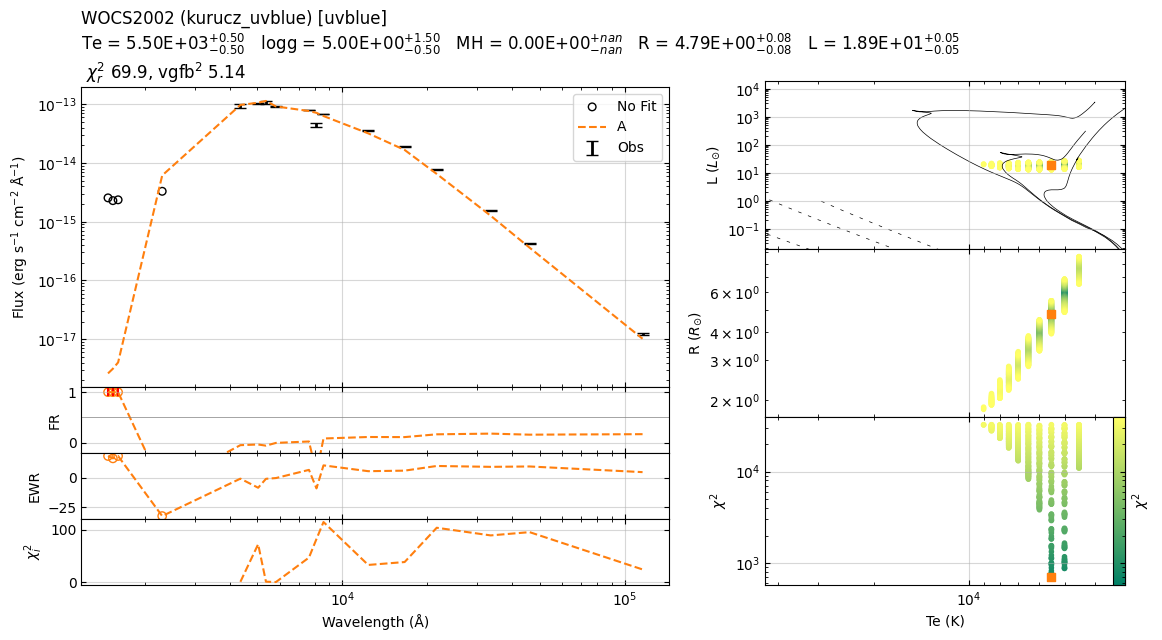

In [22]:
import src.binary_sed_fitting as bsf
import warnings
warnings.filterwarnings("ignore")
bsf.console.setLevel(bsf.logging.ERROR)
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc

refit    = False
run_name = 'uvblue'
################################################################################
model_name = 'kurucz_uvblue'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0]}
model = bsf.Model(model_name, limits=limits)
################################################################################
star = bsf.Star(name=name, 
                distance=distance, 
                e_distance=e_distance,
                filters_to_drop=[], 
                wavelength_range=[3000, 1_000_000_000],
                data=data, 
                model=model, 
                r_limits=[0.1, 10],     
                run_name=run_name)
################################################################################
star.fit_chi2(refit=refit)
star.fit_noisy_chi2(refit=refit)
################################################################################
star.plot(add_noisy_seds=False,
          folder='plots/',
          FR_cutoff=0.5)
star.save_summary()

## Advance options

- Console logging options can be changes based on requirements
    - For minimal logs: `bsf.console.setLevel(bsf.logging.ERROR)`
    - For typical logs: `bsf.console.setLevel(bsf.logging.WARNING)`
    - For detailed logs: `bsf.console.setLevel(bsf.logging.INFO)`
    - For debug logs: `bsf.console.setLevel(bsf.logging.DEBUG)`

- Editing the `bsf` file and re-importing the file
    ```python
    import importlib
    importlib.reload(bsf)
    ```
- `Star`
    - `component` : Name of the component. Useful for binary fits.

- `fit_blackbody`
    - Fits a blackbody to given flux
    - `p0` : Initial guess for the temperature and log(scaling factor). Default is [5000., -20]

- `fit_chi2`
    - `_trim` : Trimming the number of chi2 fits to save memory

- `fit_noisy_chi2`
    - `total_iterations` : Number of iterations for noisy fits

- `plot`
    - `show_plot` : Showing/hiding the plots in the notebook

- `plot_public`
    - Duplicate and modify the funcion to suit your need

- `create_sf_list`
    - `LOG_SF_STEPSIZE` (=0.01) and `LOG_SF_FLEXIBILITY` (=2) are used to determine the stepsizes in scaling factor

- `data`
    - Dataframe containing the observational data. It is cropped to the fitted filters based on `filters_to_drop` and `wavelength_range`.

- `data_all`
    - A copy of the original data with an added 'fitted' column indicating whether the filter is used. Mmodel flux, residuals, and statistical measures are added in `Fitter.get_parameters_from_chi2_minimization` and `Fitter.get_parameters_from_noisy_chi2_minimization`.

- `data_not_fitted`
    - DataFrame containing only removed filters based on `filters_to_drop` and `wavelength_range`

- `save_fig`
    - Edit the function to change the plot format (e.g. PDF, PNG or multiple formats)

- `Star.df_chi2`
    - The chi2 dataframe is saved in `outputs\`

01:06:58 ----- INFO     ----- __init__
----------------------------------------------------------
------------            WOCS2002 A            ------------
----------------------------------------------------------
01:06:58 ----- INFO     ----- drop_filters
                        Fitted           Not fitted
wavelength                                         
1481.000000                     Astrosat/UVIT.F148W
1541.000000                     Astrosat/UVIT.F154W
1608.000000                     Astrosat/UVIT.F169M
2303.366368                         GALEX/GALEX.NUV
4357.276538      KPNO/Mosaic.B                     
5035.750275     GAIA/GAIA3.Gbp                     
5366.240786      KPNO/Mosaic.V                     
5822.388714       GAIA/GAIA3.G                     
7619.959993     GAIA/GAIA3.Grp                     
8101.609574                           KPNO/Mosaic.I
8578.159519    GAIA/GAIA3.Grvs                     
12350.000000     2MASS/2MASS.J                     
16620.000000 

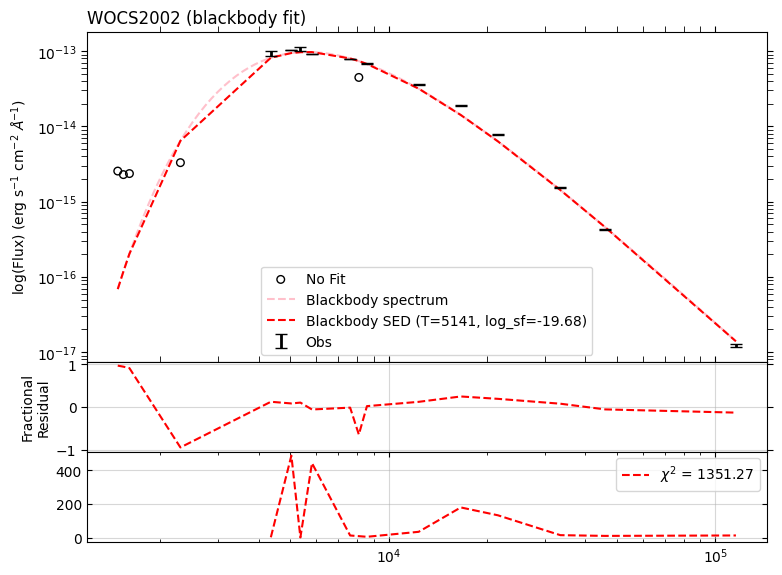

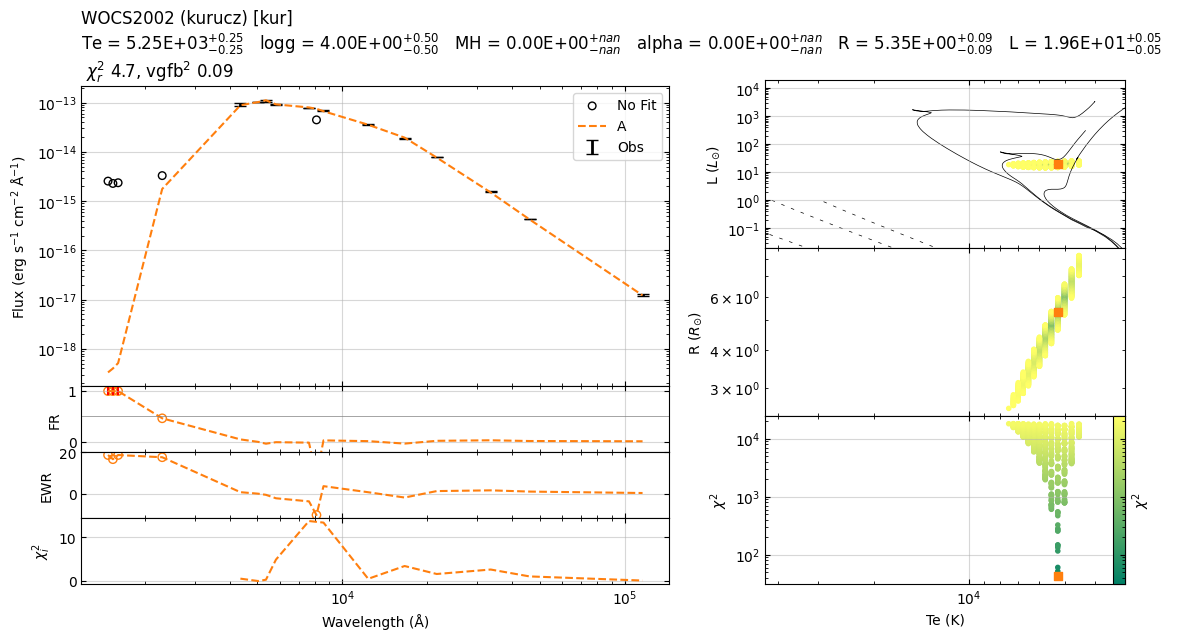

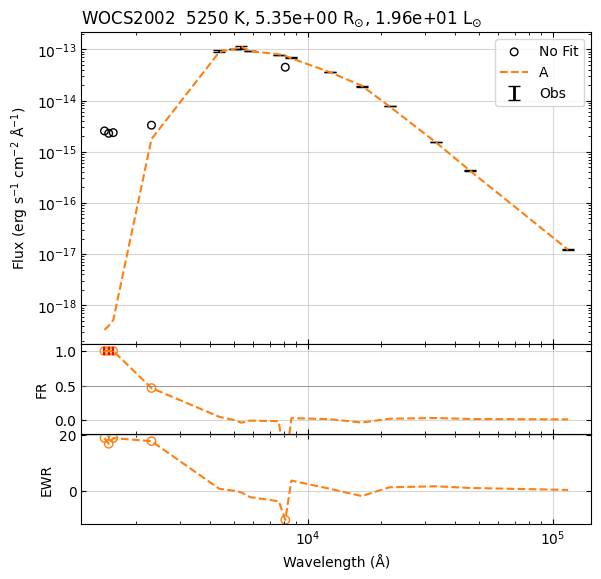

In [23]:
import src.binary_sed_fitting as bsf
import warnings
import importlib
warnings.filterwarnings("ignore")
importlib.reload(bsf)
bsf.console.setLevel(bsf.logging.INFO)
################################################################################
name        = 'WOCS2002'
file_name   = 'data/extinction_corrected_flux_files/%s.csv'%name
data        = bsf.load_data(file_name, mode='csv')
distance    = 831. # pc
e_distance  = 11.  # pc

refit = False

################################################################################
model_name = 'kurucz'
limits = {'Te'   : [3500, 9000],
          'logg' : [   3,    5],
          'MH'   : [ 0.0,  0.0],
          'alpha': [ 0.0,  0.0]}
model = bsf.Model(model_name, limits=limits)
################################################################################
star = bsf.Star(name=name, 
                distance=distance, 
                e_distance=e_distance,
                filters_to_drop=['KPNO/Mosaic.I'], 
                wavelength_range=[3000, 1_000_000_000],
                data=data, 
                model=model, 
                r_limits='blackbody',     
                run_name='kur', 
                component='A')
################################################################################
star.fit_blackbody(p0=[5000., -20], 
                   plot=True, 
                   show_plot=True, 
                   folder=None)
################################################################################
star.fit_chi2(refit=refit,
              _trim=1000)
star.fit_noisy_chi2(refit=refit,
                    total_iterations=100)
################################################################################
star.plot(add_noisy_seds=False,
          show_plot=True, 
          folder=None,
          FR_cutoff=0.5)
star.plot_public(add_noisy_seds=False,
                 show_plot=True, 
                 folder=None,
                 FR_cutoff=0.5)

In [24]:
print(star.data.index)
print(star.data_all.index)
print(star.data_not_fitted.index)
star.data.head()

Index(['KPNO/Mosaic.B', 'GAIA/GAIA3.Gbp', 'KPNO/Mosaic.V', 'GAIA/GAIA3.G',
       'GAIA/GAIA3.Grp', 'GAIA/GAIA3.Grvs', '2MASS/2MASS.J', '2MASS/2MASS.H',
       '2MASS/2MASS.Ks', 'WISE/WISE.W1', 'WISE/WISE.W2', 'WISE/WISE.W3'],
      dtype='object', name='FilterID')
Index(['Astrosat/UVIT.F148W', 'Astrosat/UVIT.F154W', 'Astrosat/UVIT.F169M',
       'GALEX/GALEX.NUV', 'KPNO/Mosaic.B', 'GAIA/GAIA3.Gbp', 'KPNO/Mosaic.V',
       'GAIA/GAIA3.G', 'GAIA/GAIA3.Grp', 'KPNO/Mosaic.I', 'GAIA/GAIA3.Grvs',
       '2MASS/2MASS.J', '2MASS/2MASS.H', '2MASS/2MASS.Ks', 'WISE/WISE.W1',
       'WISE/WISE.W2', 'WISE/WISE.W3'],
      dtype='object', name='FilterID')
Index(['Astrosat/UVIT.F148W', 'Astrosat/UVIT.F154W', 'Astrosat/UVIT.F169M',
       'GALEX/GALEX.NUV', 'KPNO/Mosaic.I'],
      dtype='object', name='FilterID')


,wavelength,flux,error,error_fraction,error_2percent,error_10percent,log_wavelength,log_flux,e_log_flux,fitted,...,chi2_i,vgf2_i,vgfb2_i,model_flux_median,residual_flux_median,fractional_residual_median,ewr_median,chi2_i_median,vgf2_i_median,vgfb2_i_median
FilterID,,,,,,,,,,,,,,,,,,,,,
KPNO/Mosaic.B,4357.276538,9.309407e-14,6.130611e-15,0.065854,6.130611e-15,9.309407e-15,3.639215,-13.031078,0.028600,1,...,0.545713,0.545713,2.366614e-01,8.856524e-14,4.528827e-15,0.048648,0.738724,0.545713,0.545713,2.366614e-01
GAIA/GAIA3.Gbp,5035.750275,1.028575e-13,3.881303e-16,0.003773,2.057150e-15,1.028575e-14,3.702064,-12.987764,0.001639,1,...,0.000081,0.000003,1.150317e-07,1.028540e-13,3.488548e-18,0.000034,0.008988,0.000081,0.000003,1.150317e-07
KPNO/Mosaic.V,5366.240786,1.079375e-13,7.108112e-15,0.065854,7.108112e-15,1.079375e-14,3.729670,-12.966827,0.028600,1,...,0.298088,0.298088,1.292732e-01,1.118184e-13,-3.880849e-15,-0.035955,-0.545975,0.298088,0.298088,1.292732e-01
GAIA/GAIA3.G,5822.388714,9.174216e-14,2.539155e-16,0.002768,1.834843e-15,9.174216e-15,3.765101,-13.037431,0.001202,1,...,4.897155,0.093783,3.751321e-03,9.230407e-14,-5.619026e-16,-0.006125,-2.212952,4.897155,0.093783,3.751321e-03
GAIA/GAIA3.Grp,7619.959993,7.878734e-14,3.154436e-16,0.004004,1.575747e-15,7.878734e-15,3.881953,-13.103544,0.001739,1,...,13.712697,0.549533,2.198131e-02,7.995544e-14,-1.168108e-15,-0.014826,-3.703066,13.712697,0.549533,2.198131e-02
